In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [4]:
data,target = load_iris(return_X_y = True)



train_test split


In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(data,target,test_size=0.3)

converting data to pandas Dataframe for better visualization


In [11]:

data = pd.DataFrame(data,columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])
data["target"] = pd.Series(target)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


training model


In [14]:
model = LogisticRegression()

model.fit(X_train,Y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

evaluate model

1.0


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


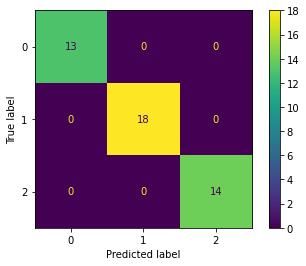

In [18]:
y_pred = model.predict(X_test)
print(model.score(X_test,Y_test))

plot_confusion_matrix(model,X_test,Y_test)

data visualization

(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 <BarContainer object of 20 artists>)

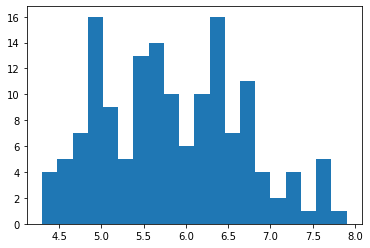

In [19]:
plt.hist(data["SepalLengthCm"],bins=20)

(array([ 1.,  3.,  4.,  3.,  8., 14., 14., 10., 26., 11., 19., 12.,  6.,
         4.,  9.,  2.,  1.,  1.,  1.,  1.]),
 array([2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96, 3.08, 3.2 ,
        3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28, 4.4 ]),
 <BarContainer object of 20 artists>)

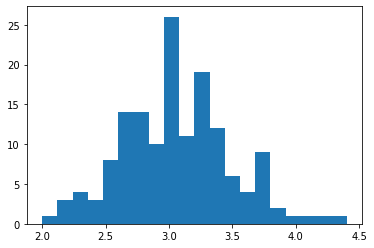

In [20]:
plt.hist(data["SepalWidthCm"],bins=20)

(array([ 4., 33., 11.,  2.,  0.,  0.,  1.,  2.,  3.,  5., 12., 14., 12.,
        17.,  6., 12.,  7.,  4.,  2.,  3.]),
 array([1.   , 1.295, 1.59 , 1.885, 2.18 , 2.475, 2.77 , 3.065, 3.36 ,
        3.655, 3.95 , 4.245, 4.54 , 4.835, 5.13 , 5.425, 5.72 , 6.015,
        6.31 , 6.605, 6.9  ]),
 <BarContainer object of 20 artists>)

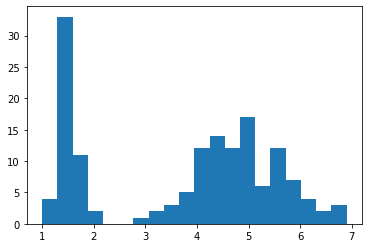

In [21]:
plt.hist(data["PetalLengthCm"],bins=20)

(array([34.,  7.,  7.,  1.,  1.,  0.,  0.,  7.,  3.,  5., 21., 12.,  4.,
         2., 12., 11.,  6.,  3.,  8.,  6.]),
 array([0.1 , 0.22, 0.34, 0.46, 0.58, 0.7 , 0.82, 0.94, 1.06, 1.18, 1.3 ,
        1.42, 1.54, 1.66, 1.78, 1.9 , 2.02, 2.14, 2.26, 2.38, 2.5 ]),
 <BarContainer object of 20 artists>)

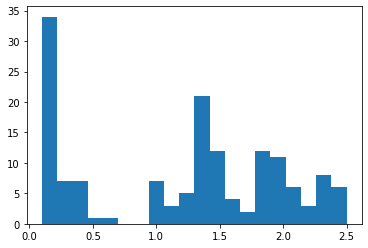

In [22]:
plt.hist(data["PetalWidthCm"],bins=20)

<AxesSubplot:>

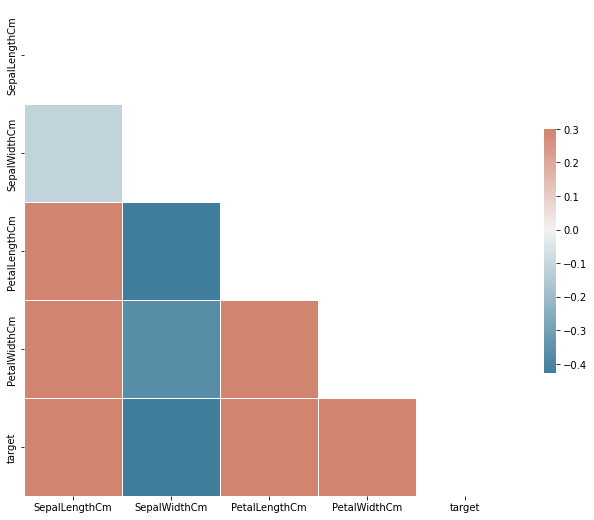

In [23]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})